# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Banny Juanda
- **Email:** bannyjuanda@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?
- Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Missing value day

In [5]:
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicate data day

In [6]:
duplicated = day_df.duplicated()
print(f"Jumlah Duplikasi Data: {duplicated.sum()}")

Jumlah Duplikasi Data: 0


- Missing value data hour

In [7]:
missing_values_hour = hour_df.isnull().sum()
print(missing_values_hour)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicated data hour

In [8]:
duplicated_hour = hour_df.duplicated()
print(f"Jumlah Duplikasi Data: {duplicated_hour.sum()}")

Jumlah Duplikasi Data: 0


### Cleaning Data

In [9]:
day_df_cleaned = day_df.dropna()
print(f"Jumlah data setelah menghapus missing values di day_df: {day_df_cleaned.shape[0]}")

hour_df_cleaned = hour_df.dropna()
print(f"Jumlah data setelah menghapus missing values di hour_df: {hour_df_cleaned.shape[0]}")

Jumlah data setelah menghapus missing values di day_df: 731
Jumlah data setelah menghapus missing values di hour_df: 17379


## Exploratory Data Analysis (EDA)

### Explore `day_df_cleaned`

In [10]:
day_df_cleaned.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
day_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
206,207,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590
232,233,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754,1249,2624,3873
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729
230,231,2011-08-19,3,0,8,0,5,1,2,0.685000,0.633221,0.722917,0.139308,797,3356,4153
166,167,2011-06-16,2,0,6,0,4,1,2,0.628333,0.595346,0.688333,0.206471,545,3222,3767
214,215,2011-08-03,3,0,8,0,3,1,2,0.731667,0.679937,0.657500,0.135583,467,3107,3574
343,344,2011-12-10,4,0,12,0,6,0,1,0.275000,0.266412,0.507500,0.233221,502,2688,3190
614,615,2012-09-06,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421,611,5592,6203
604,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917


In [12]:
day_df_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Explore `hour_df_cleaned`

In [13]:
hour_df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
hour_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4107,4108,2011-06-25,3,0,6,1,0,6,0,1,0.66,0.6212,0.50,0.1642,20,75,95
15323,15324,2012-10-05,4,1,10,16,0,5,1,1,0.72,0.6515,0.37,0.0000,153,481,634
5745,5746,2011-09-01,3,0,9,20,0,4,1,1,0.66,0.6212,0.61,0.2239,33,247,280
3825,3826,2011-06-13,2,0,6,7,0,1,1,1,0.56,0.5303,0.56,0.3582,26,302,328
12491,12492,2012-06-09,2,1,6,16,0,6,0,1,0.82,0.6970,0.24,0.1940,219,315,534
11216,11217,2012-04-17,2,1,4,13,0,2,1,1,0.62,0.6212,0.29,0.2537,52,187,239
6077,6078,2011-09-15,3,0,9,19,0,4,1,1,0.46,0.4545,0.67,0.4627,20,212,232
2289,2290,2011-04-10,2,0,4,6,0,0,0,2,0.36,0.3636,0.93,0.0896,0,4,4
2551,2552,2011-04-21,2,0,4,5,0,4,1,2,0.42,0.4242,0.54,0.5522,0,14,14
4140,4141,2011-06-26,3,0,6,10,0,0,0,1,0.72,0.6667,0.48,0.1045,136,196,332


In [15]:
hour_df_cleaned.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

In [16]:
day_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
651,652,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109
481,482,2012-04-26,2,1,4,0,4,1,2,0.498333,0.483583,0.756667,0.176625,475,4551,5026
331,332,2011-11-28,4,0,11,0,1,1,1,0.503478,0.490122,0.743043,0.142122,253,3614,3867
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845
153,154,2011-06-03,2,0,6,0,5,1,1,0.620000,0.587133,0.354167,0.253121,898,4414,5312
303,304,2011-10-31,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,3669
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999
608,609,2012-08-31,3,1,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,1433,5917,7350


In [17]:
day_df_cleaned.head(), day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

### Mencari Korelasi 

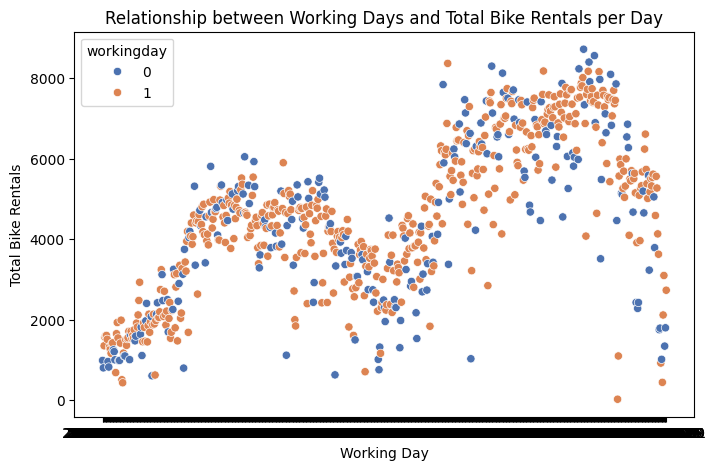

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df_cleaned['dteday'], y=day_df_cleaned['cnt'], hue=day_df_cleaned['workingday'], palette='deep')
plt.title("Relationship between Working Days and Total Bike Rentals per Day")
plt.xlabel("Working Day")
plt.ylabel("Total Bike Rentals")
plt.show()

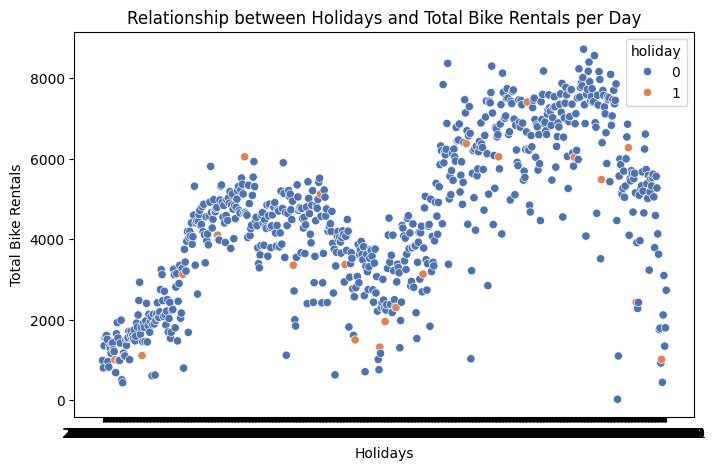

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df_cleaned['dteday'], y=day_df_cleaned['cnt'], hue=day_df_cleaned['holiday'], palette='deep')
plt.title("Relationship between Holidays and Total Bike Rentals per Day")
plt.xlabel("Holidays")
plt.ylabel("Total Bike Rentals")
plt.show()

### Perbandingan penggunaan sepeda pada `workingday` dengan `holidays`

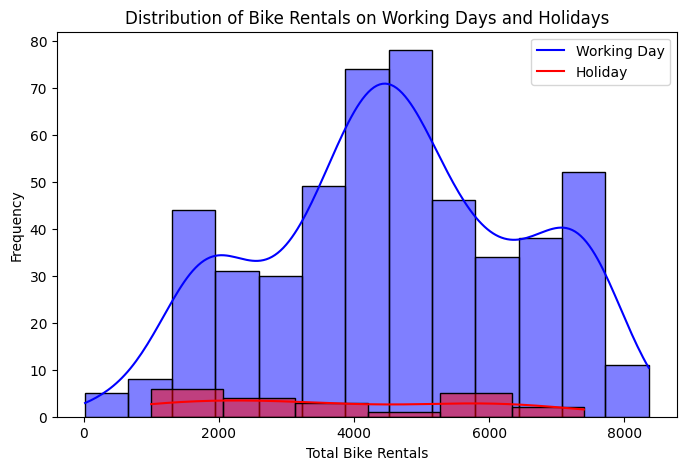

In [20]:
working_day = day_df_cleaned[day_df_cleaned['workingday'] == 1]['cnt']
holiday = day_df_cleaned[day_df_cleaned['holiday'] == 1]['cnt']

plt.figure(figsize=(8,5))
sns.histplot(working_day, color='blue', kde=True)
sns.histplot(holiday, color='red', kde=True)
plt.title("Distribution of Bike Rentals on Working Days and Holidays")
plt.xlabel("Total Bike Rentals")
plt.ylabel("Frequency")
plt.legend(['Working Day', 'Holiday'])
plt.show()

Dapat kita lihat dari grafik di atas, bahwa penyewaan sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur, dengan puncak penyewaan sekitar 4000-5000 sepeda per hari pada hari kerja, sementara pada hari libur penyewaan cenderung sangat rendah, berada di bawah 2000 sepeda. Frekuensi penyewaan pada hari kerja tersebar lebih luas dan lebih bervariasi, menandakan bahwa sepeda lebih banyak digunakan sebagai alat transportasi pada hari kerja, mungkin untuk kegiatan rutin seperti pergi ke tempat kerja atau sekolah. Sebaliknya, penyewaan pada hari libur sangat terbatas, menunjukkan bahwa sepeda lebih jarang digunakan saat liburan atau waktu senggang.

### Pertanyaan 2: Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?

In [21]:
day_df_cleaned.head(), day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

### Mencari korelasi

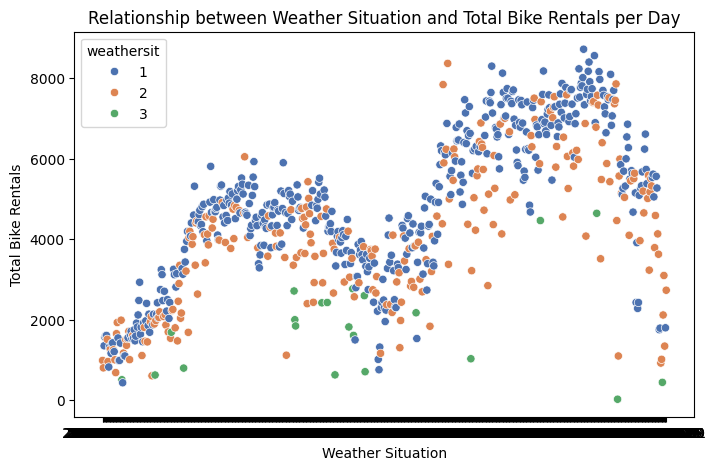

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df_cleaned['dteday'], y=day_df_cleaned['cnt'], hue=day_df_cleaned['weathersit'], palette='deep')
plt.title("Relationship between Weather Situation and Total Bike Rentals per Day")
plt.xlabel("Weather Situation")
plt.ylabel("Total Bike Rentals")
plt.show()

Dari grafik di atas menunjukkan hubungan antara situasi cuaca, Weathersit 1 (biru) mewakili cuaca cerah(`Clear`), weathersit 2 (oranye) mewakili kabut + berawan(`Mist + Cloudy`), dan weathersit 3 (hijau) mewakili hujan atau salju ringan(`Light Rain/Snow`). Sebagian besar penyewaan sepeda terjadi pada saat cuaca cerah, terlihat dari banyaknya titik biru di bagian atas grafik, yang menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi ketika cuaca baik. Pada cuaca kabut atau berawan, penyewaan sepeda masih cukup tinggi, meskipun sedikit berkurang dibandingkan cuaca cerah, yang berarti kabut atau awan tidak terlalu menghalangi orang untuk menyewa sepeda. Sebaliknya, pada cuaca hujan atau salju ringan, jumlah penyewaan sepeda menurun drastis, dengan sedikit titik hijau yang tersebar di bagian bawah grafik, menunjukkan bahwa cuaca buruk berdampak signifikan pada penurunan jumlah penyewaan sepeda. Secara keseluruhan, semakin buruk kondisi cuaca, jumlah penyewaan sepeda per hari semakin menurun.

### Pengaruh cuaca pada penggunaan sepeda

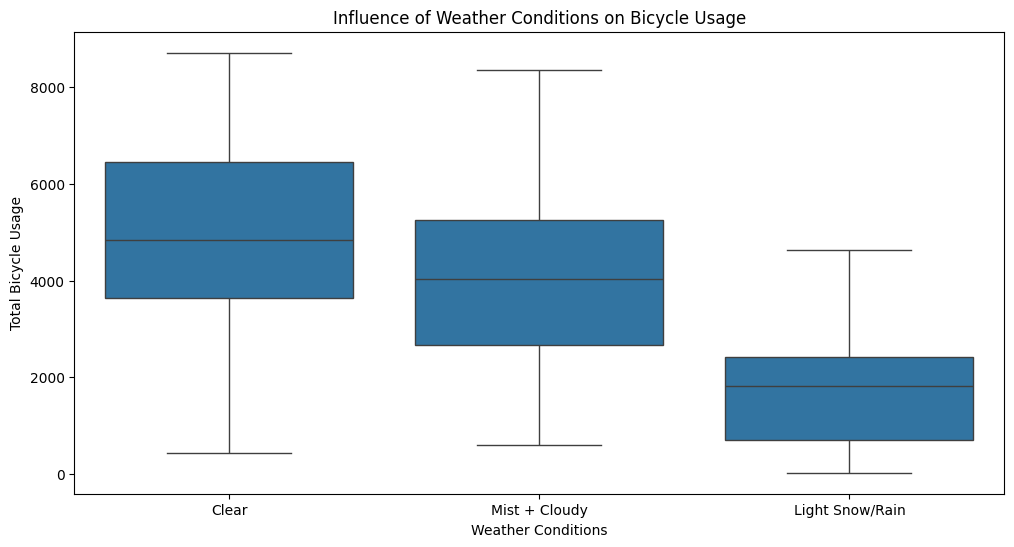

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Influence of Weather Conditions on Bicycle Usage')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Bicycle Usage')
plt.xticks(ticks=[0, 1, 2], labels=['Clear', 'Mist + Cloudy', 'Light Snow/Rain'])
plt.show()

Dari grafik boxplot di atas, pada kondisi cerah penggunaan sepeda terlihat paling tinggi dengan rentang interkuartil yang luas, menunjukkan bahwa banyak orang menyewa sepeda pada cuaca ini. Kondisi cuaca kabut + berawan masih memiliki penggunaan sepeda yang signifikan, meskipun median penyewaannya sedikit lebih rendah dibandingkan cuaca cerah. Pada kondisi hujan atau salju ringan, penggunaan sepeda menurun secara signifikan dengan rentang interkuartil yang lebih kecil dan median yang lebih rendah, menunjukkan bahwa cuaca buruk mengurangi minat orang untuk menyewa sepeda. Secara keseluruhan, semakin buruk kondisi cuaca, semakin rendah penggunaan sepeda.

In [24]:
# day_df_cleaned.to_csv('data/day_cleaned.csv', index=False)

## Conclusion

### **Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?** 
Pada hari kerja, penyebaran data lebih luas dan ada beberapa puncak, yang menunjukkan variasi yang lebih besar dalam jumlah penyewaan sepeda. Sementara pada hari libur, penyebaran data lebih sempit dengan jumlah penyewaan sepeda yang lebih stabil di sekitar nilai rendah.
### **Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?** 
Pada cuaca cerah, penggunaan sepeda paling tinggi dengan variasi yang lebih besar, sedangkan pada cuaca berkabut atau berawan, penggunaan sedikit lebih rendah namun masih cukup bervariasi. Kondisi hujan atau salju ringan mengakibatkan penurunan signifikan dalam penggunaan sepeda, dengan variasi yang lebih sempit dan median yang lebih rendah. Tidak ada data yang ditampilkan untuk hujan atau salju lebat, yang mengindikasikan bahwa penggunaan sepeda sangat rendah atau tidak ada dalam kondisi cuaca buruk tersebut.